In [98]:
from sklearn.svm import LinearSVR
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor 

In [99]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
# from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [100]:
from sklearn import metrics
import math

In [101]:
from sklearn.model_selection import cross_val_score 
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [102]:
from numpy.random import seed 
seed(200)

In [103]:
data = pd.read_excel('data/CO2_20250208.xlsx', sheet_name='CO2 solubility data')

In [104]:
data.head(8)

,No.,IL,x_CO2 (mol/kg sorbent),T (K),P (bar),IF1,IF2,IF3,IF4,IF5,...,IF35,IF36,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44
0,1,[Bis(mim)C2][Gly]2,0.8504,313.15,0.1154,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,[Bis(mim)C2][Gly]2,1.1442,313.15,0.2692,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,[Bis(mim)C2][Gly]2,1.4535,313.15,0.5385,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,[Bis(mim)C2][Gly]2,2.3503,313.15,0.8462,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,[Bis(mim)C2][Gly]2,2.4895,313.15,1.3077,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,[Bis(mim)C2][Gly]2,2.5823,313.15,1.7308,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,[Bis(mim)C2][Gly]2,2.6132,313.15,2.0000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,[Bis(mim)C2][Gly]2,2.6441,313.15,2.9615,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
print(data.shape)

(2500, 49)


In [106]:
exclude =['No.','IL']
y='x_CO2 (mol/kg sorbent)'
features = [var for var in data.columns if var not in exclude+[y]]
print(len(features), len(exclude))

46 2


In [107]:
data = data.fillna(int(0))

In [108]:
data.head(6)

,No.,IL,x_CO2 (mol/kg sorbent),T (K),P (bar),IF1,IF2,IF3,IF4,IF5,...,IF35,IF36,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44
0,1,[Bis(mim)C2][Gly]2,0.8504,313.15,0.1154,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,[Bis(mim)C2][Gly]2,1.1442,313.15,0.2692,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,[Bis(mim)C2][Gly]2,1.4535,313.15,0.5385,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,[Bis(mim)C2][Gly]2,2.3503,313.15,0.8462,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,[Bis(mim)C2][Gly]2,2.4895,313.15,1.3077,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,[Bis(mim)C2][Gly]2,2.5823,313.15,1.7308,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
data[features].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T (K)    2500 non-null   float64
 1   P (bar)  2500 non-null   float64
 2   IF1      2500 non-null   int64  
 3   IF2      2500 non-null   int64  
 4   IF3      2500 non-null   int64  
 5   IF4      2500 non-null   int64  
 6   IF5      2500 non-null   int64  
 7   IF6      2500 non-null   int64  
 8   IF7      2500 non-null   int64  
 9   IF8      2500 non-null   int64  
 10  IF9      2500 non-null   int64  
 11  IF10     2500 non-null   int64  
 12  IF11     2500 non-null   int64  
 13  IF12     2500 non-null   int64  
 14  IF13     2500 non-null   int64  
 15  IF14     2500 non-null   int64  
 16  IF15     2500 non-null   int64  
 17  IF16     2500 non-null   int64  
 18  IF17     2500 non-null   int64  
 19  IF18     2500 non-null   int64  
 20  IF19     2500 non-null   int64  
 21  IF20     2500 

In [110]:
single_var =[]
for var in features:
    print(var, "----",len(data[var].unique()),data[var].unique())
    if len(data[var].unique())==1:
        single_var.append(var)

T (K) ---- 48 [313.15 293.15 303.15 323.15 298.2  298.1  298.   298.3  288.15 298.15
 308.15 318.15 303.16 313.28 313.31 323.32 323.34 333.35 333.36 333.41
 353.55 353.18 295.15 283.1  323.1  348.1  348.2  310.15 333.15 343.15
 303.2  313.2  323.2  343.2  353.2  328.15 338.15 333.2  295.12 353.15
 296.15 373.15 393.15 308.   318.   328.   338.   283.15]
P (bar) ---- 1112 [0.1154 0.2692 0.5385 ... 0.234  0.239  0.419 ]
IF1 ---- 4 [ 2  1  0 10]
IF2 ---- 2 [0 1]
IF3 ---- 3 [0 2 1]
IF4 ---- 2 [0 1]
IF5 ---- 2 [0 1]
IF6 ---- 5 [ 0  1  2  3 10]
IF7 ---- 2 [0 1]
IF8 ---- 2 [0 1]
IF9 ---- 2 [0 1]
IF10 ---- 4 [0 3 2 1]
IF11 ---- 2 [0 1]
IF12 ---- 3 [0 2 1]
IF13 ---- 3 [0 1 2]
IF14 ---- 2 [0 1]
IF15 ---- 11 [ 2  4  5  3 20  1  6  8 12  7 40]
IF16 ---- 32 [  4   2   6   3   5   7   8   1  25  11  14   0  10  31  29  30  32  20
  26  21  12  24  22  33  17  13  16  28 295  58  57  56]
IF17 ---- 3 [0 1 2]
IF18 ---- 2 [0 1]
IF19 ---- 2 [0 1]
IF20 ---- 3 [0 2 1]
IF21 ---- 2 [0 1]
IF22 ---- 14 [ 6 12 

In [111]:
single_var

[]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data[features+exclude], data[y], test_size=0.2, random_state=512)
print(X_train.shape, X_test.shape)

(2000, 48) (500, 48)


In [113]:
use_feature = [var for var in features if var not in single_var]

In [114]:
sc = StandardScaler()
sc.fit(X_train[use_feature])

StandardScaler()

In [115]:
sc.mean_

array([3.10632380e+02, 1.83707045e+00, 4.51000000e-01, 5.00000000e-04,
       1.34500000e-01, 4.30000000e-02, 1.72500000e-01, 4.72000000e-01,
       2.15000000e-02, 9.00000000e-03, 9.00000000e-03, 4.50000000e-03,
       2.00000000e-03, 1.21000000e-01, 3.90000000e-02, 6.15000000e-02,
       3.44700000e+00, 1.29545000e+01, 3.31000000e-01, 4.00000000e-03,
       1.19000000e-01, 1.20000000e-01, 1.65000000e-02, 3.68900000e+00,
       8.30000000e-01, 1.65000000e-01, 4.60000000e-02, 1.65000000e-02,
       1.42000000e-01, 1.85000000e-02, 5.05500000e-01, 7.14000000e-01,
       6.55000000e-02, 5.85000000e-02, 5.15000000e-02, 9.80000000e-02,
       2.70000000e-02, 1.00000000e-03, 6.30000000e-02, 3.65000000e-02,
       1.65000000e-02, 6.00000000e-03, 3.35000000e-02, 1.00000000e-02,
       5.00000000e-04, 1.00000000e-03])

In [116]:
X_train_scale = sc.transform(X_train[use_feature]) 

In [117]:
X_train[use_feature].head(1)

,T (K),P (bar),IF1,IF2,IF3,IF4,IF5,IF6,IF7,IF8,...,IF35,IF36,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44
268,288.15,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train_scale[0:1]

array([[-1.25694529,  0.55835751,  0.86416626, -0.02236627, -0.32774696,
        -0.21197188, -0.45657334, -0.59221756, -0.14823092, -0.09529814,
        -0.09529814, -0.0488676 , -0.04476615, -0.30122345, -0.16708984,
        -0.25598848, -0.54581662, -0.43457622, -0.58748645, -0.06337243,
        -0.36752385, -0.36753834, -0.12952535, -0.19788331,  0.1258362 ,
        -0.34725301, -0.1627526 , -0.12952535, -0.30565141, -0.13729057,
         0.74892464,  0.3242047 , -0.26474697, -0.21789901, -0.23301557,
        -0.29231469, -0.166581  , -0.0316386 , -0.25929878, -0.19463484,
        -0.12952535, -0.0776931 , -0.18617505, -0.10050378, -0.02236627,
        -0.0316386 ]])

In [53]:
from itertools import product

first_layer_neurons= np.arange(10, 111,5)
second_layer_neurons= np.arange(10, 111, 5)
hidden_layer_sizes =  list(product(first_layer_neurons, second_layer_neurons))
learning_rate_init= [0.01,0.05]
activation= [ 'relu']
params_grid = {
                'hidden_layer_sizes':hidden_layer_sizes,
                'learning_rate_init':learning_rate_init,
                'activation':activation}

In [54]:
print(params_grid)

{'hidden_layer_sizes': [(10, 10), (10, 15), (10, 20), (10, 25), (10, 30), (10, 35), (10, 40), (10, 45), (10, 50), (10, 55), (10, 60), (10, 65), (10, 70), (10, 75), (10, 80), (10, 85), (10, 90), (10, 95), (10, 100), (10, 105), (10, 110), (15, 10), (15, 15), (15, 20), (15, 25), (15, 30), (15, 35), (15, 40), (15, 45), (15, 50), (15, 55), (15, 60), (15, 65), (15, 70), (15, 75), (15, 80), (15, 85), (15, 90), (15, 95), (15, 100), (15, 105), (15, 110), (20, 10), (20, 15), (20, 20), (20, 25), (20, 30), (20, 35), (20, 40), (20, 45), (20, 50), (20, 55), (20, 60), (20, 65), (20, 70), (20, 75), (20, 80), (20, 85), (20, 90), (20, 95), (20, 100), (20, 105), (20, 110), (25, 10), (25, 15), (25, 20), (25, 25), (25, 30), (25, 35), (25, 40), (25, 45), (25, 50), (25, 55), (25, 60), (25, 65), (25, 70), (25, 75), (25, 80), (25, 85), (25, 90), (25, 95), (25, 100), (25, 105), (25, 110), (30, 10), (30, 15), (30, 20), (30, 25), (30, 30), (30, 35), (30, 40), (30, 45), (30, 50), (30, 55), (30, 60), (30, 65), (30,

In [55]:
mlp = MLPRegressor(hidden_layer_sizes='params_grid', activation="relu", 
                 solver='adam', alpha=0.001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init= [0.01,0.05],
                 power_t=0.5, max_iter=500,tol=1e-4) 

In [56]:
grid_search = GridSearchCV(estimator=mlp, param_grid=params_grid, scoring='neg_mean_squared_error',cv=5)

In [57]:
grid_result = grid_search.fit(X_train_scale, y_train)

In [58]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (95, 45), 'learning_rate_init': 0.01}
Best Score:  -0.19559256326527794


In [59]:
results = grid_search.cv_results_
mse_scores = -results['mean_test_score'] 

In [60]:
df_results = pd.DataFrame(results)
df_results['mean_test_mse'] = mse_scores  
print(df_results[['params', 'mean_test_mse']])

                                                params  mean_test_mse
0    {'activation': 'relu', 'hidden_layer_sizes': (...       0.419811
1    {'activation': 'relu', 'hidden_layer_sizes': (...       0.381190
2    {'activation': 'relu', 'hidden_layer_sizes': (...       0.317095
3    {'activation': 'relu', 'hidden_layer_sizes': (...       0.360018
4    {'activation': 'relu', 'hidden_layer_sizes': (...       1.312697
..                                                 ...            ...
877  {'activation': 'relu', 'hidden_layer_sizes': (...       1.171983
878  {'activation': 'relu', 'hidden_layer_sizes': (...       0.253916
879  {'activation': 'relu', 'hidden_layer_sizes': (...       1.051284
880  {'activation': 'relu', 'hidden_layer_sizes': (...       0.254046
881  {'activation': 'relu', 'hidden_layer_sizes': (...       1.292121

[882 rows x 2 columns]


In [61]:
show_columns = [
    'params', 
    'mean_test_mse', 
]

In [62]:
print("\n所有参数组合的搜索结果：")
print(df_results[show_columns].sort_values(by='mean_test_mse'))


所有参数组合的搜索结果：
                                                params  mean_test_mse
728  {'activation': 'relu', 'hidden_layer_sizes': (...       0.195593
702  {'activation': 'relu', 'hidden_layer_sizes': (...       0.195958
866  {'activation': 'relu', 'hidden_layer_sizes': (...       0.197029
416  {'activation': 'relu', 'hidden_layer_sizes': (...       0.205480
708  {'activation': 'relu', 'hidden_layer_sizes': (...       0.206188
..                                                 ...            ...
747  {'activation': 'relu', 'hidden_layer_sizes': (...       1.467496
865  {'activation': 'relu', 'hidden_layer_sizes': (...       1.467632
785  {'activation': 'relu', 'hidden_layer_sizes': (...       1.467763
661  {'activation': 'relu', 'hidden_layer_sizes': (...       1.467886
539  {'activation': 'relu', 'hidden_layer_sizes': (...       1.467913

[882 rows x 2 columns]


In [63]:
# 输出完整结果到CSV文件
df_results.to_csv("grid_search_results.csv", index=False)
print("\n完整结果已保存到 grid_search_results.csv")


完整结果已保存到 grid_search_results.csv


In [64]:

x = []  
y = []  
z = []  
for params, score in zip(df_results['params'], df_results['mean_test_mse']):
    layers = params['hidden_layer_sizes']
    x.append(layers[0])
    y.append(layers[1] if len(layers) > 1 else 0)
    z.append(score)

In [65]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

In [67]:
from scipy.interpolate import griddata

xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')  

In [73]:
import matplotlib.collections as mc

TypeError: Axes3D.scatter() missing 2 required positional arguments: 'xs' and 'ys'

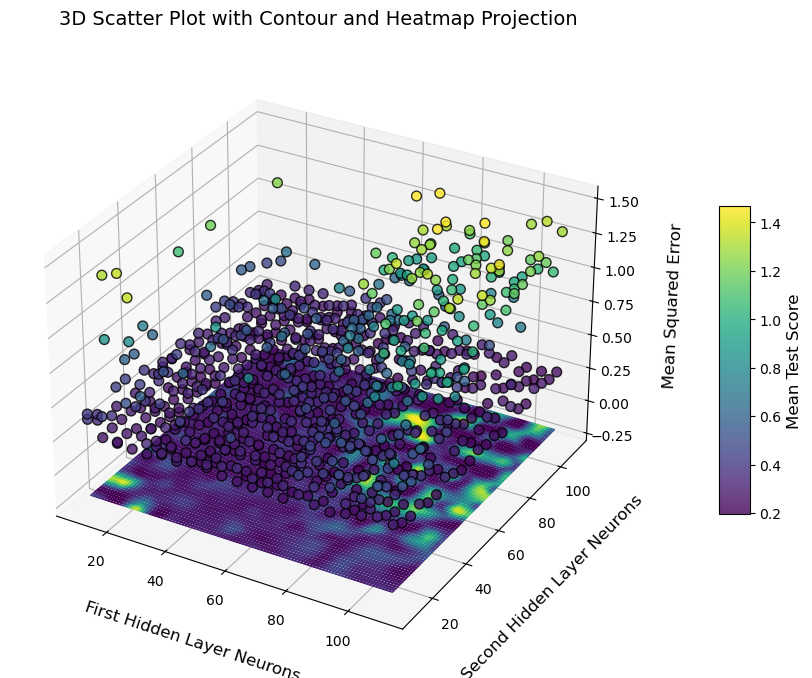

In [97]:
# 创建画布和三维坐标系
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# --- 绘制三维散点图 ---
scatter = ax.scatter(
    x, y, z,
    c=z,                   
    cmap='viridis',        
    s=50,                  
    edgecolors='k',        
    alpha=0.8,             
    label='Data Points'
)



vmin, vmax = z.min(), z.max()
norm = plt.Normalize(vmin, vmax)  
colors = plt.cm.viridis(norm(zi))  

heatmap_offset = z_offset - 0.1 * (z.max() - z.min())
heatmap = ax.plot_surface(
    xi, yi, 
    np.full_like(xi, heatmap_offset),  # 固定z值为偏移量
    facecolors=colors,
    shade=False,  # 禁用光照避免颜色失真
    alpha=0.3,
    zorder=-1,    # 确保热力图层在散点下方
    rstride=1,    # 密集渲染
    cstride=1
)
# --- 设置坐标轴和标题 ---
ax.set_xlabel('First Hidden Layer Neurons', fontsize=12, labelpad=15)
ax.set_ylabel('Second Hidden Layer Neurons', fontsize=12, labelpad=15)
ax.set_zlabel('Mean Squared Error', fontsize=12, labelpad=15)
ax.set_title('3D Scatter Plot with Contour and Heatmap Projection', fontsize=14, pad=20)

# --- 颜色映射范围统一 ---
scatter.set_clim(vmin, vmax)
contour.set_clim(vmin, vmax)

# --- 添加颜色条 ---
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Mean Test Score', fontsize=12)

ax.scatter(x=95, y=45, z=0.19559256326527794, c='red', s=200, marker='*'
           )

# --- 调整视角和显示 ---
ax.view_init(elev=25, azim=-45)
ax.set_zlim(heatmap_offset, z.max())  # 确保热力图在z轴可见
plt.tight_layout()
plt.show()

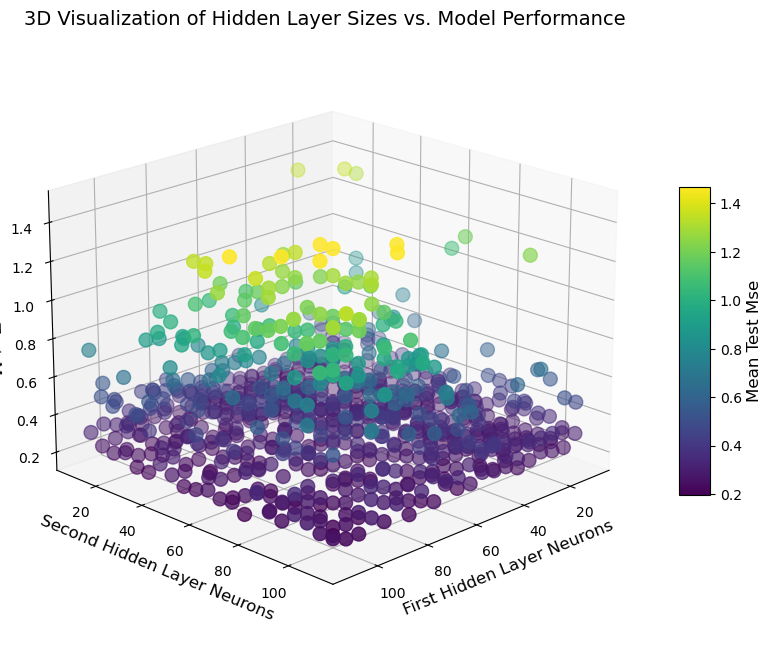

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=100, depthshade=True)

# 添加标签和标题
ax.set_xlabel('First Hidden Layer Neurons', fontsize=12)
ax.set_ylabel('Second Hidden Layer Neurons', fontsize=12)
ax.set_zlabel('Mean Test Mse', fontsize=12)
ax.set_title('3D Visualization of Hidden Layer Sizes vs. Model Performance', fontsize=14)

# 添加颜色条
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Mean Test Mse', fontsize=12)

# 调整视角
ax.view_init(elev=20, azim=45)

plt.show()

In [204]:
mlp = MLPRegressor(hidden_layer_sizes=(95,45), activation="relu", 
                  solver='adam', alpha=0.001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init= 0.01,
                 power_t=0.5, max_iter=500,tol=1e-4) 

In [206]:
mlp.fit(X_train_scale, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(95, 45), learning_rate_init=0.01,
             max_iter=500)

In [207]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (95, 45),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [208]:
mlp.intercepts_

[array([ 3.50554007e-03, -3.17966155e-02, -3.59390627e-01,  1.50321558e-01,
         3.54119872e-04,  1.66369383e-01, -1.04359746e-01, -8.39710277e-02,
        -3.69804343e-01, -4.14278114e-02, -2.14671389e-03, -2.03283905e-01,
        -2.96000944e-01, -3.65503088e-02,  1.53546672e-01,  1.45051237e-01,
        -2.24986700e-01, -5.44949625e-02, -3.30324707e-01, -1.21172337e-01,
         6.42045637e-03, -1.80730038e-01, -4.91116289e-01, -5.32351574e-02,
        -2.04909712e-01,  8.59054368e-02, -1.40186147e-01, -8.59276707e-02,
         1.91786551e-01, -1.27410685e-01, -2.11844675e-01, -1.23023690e-01,
        -1.88996819e-01,  3.92349050e-02, -3.68787221e-01, -8.05803410e-02,
        -2.07467559e-01, -5.61240071e-01,  8.03944529e-02,  3.01495877e-02,
         1.92484840e-01, -2.95890490e-01, -2.05800044e-01, -1.33795239e-01,
         2.55001200e-02,  1.44139100e-01,  8.65866094e-02, -2.14150269e-01,
         7.60583669e-02,  1.19182840e-01, -1.92330773e-01, -8.66736957e-02,
        -2.5

In [209]:
# 参数  w1取值
mlp.coefs_[0]

array([[ 0.1819115 , -0.40725211, -0.49101222, ...,  0.07091747,
        -0.4489316 ,  0.52893278],
       [-0.78674979,  0.40554583, -0.13010358, ...,  0.57812139,
         0.11796594,  0.14241849],
       [ 0.26476063,  0.16086744,  0.13404082, ...,  0.05893515,
         0.12913892, -0.10236549],
       ...,
       [ 0.11059897,  0.08708017,  0.11099524, ...,  0.0817642 ,
         0.13487274, -0.17580087],
       [ 0.16401077,  0.1080383 ,  0.0987357 , ..., -0.06413971,
        -0.02988802, -0.01659594],
       [ 0.23678021,  0.19975124, -0.07708787, ...,  0.07416604,
         0.09845105, -0.03077407]])

In [210]:
mlp.coefs_[0].shape

(46, 95)

In [211]:
# 参数 w2 取值
mlp.coefs_[1]

array([[-0.36406774, -0.25506717, -0.22974256, ...,  0.00889497,
        -0.02411498,  0.00355604],
       [-0.07475421,  0.08679035, -0.19391703, ...,  0.17034414,
        -0.18143324,  0.05183966],
       [ 0.04100156, -0.18351495,  0.17164499, ..., -0.02991328,
         0.0085825 , -0.23307564],
       ...,
       [-0.05520153, -0.11841534, -0.29747708, ...,  0.00582555,
         0.0742173 , -0.13089557],
       [ 0.26144815,  0.04891854, -0.01816756, ..., -0.06391617,
         0.02595953,  0.06509071],
       [-0.09641787, -0.14774164,  0.11028497, ...,  0.00058275,
        -0.08456828,  0.03653555]])

In [212]:
mlp.coefs_[1].shape

(95, 45)

In [219]:
X_test_scale = sc.transform(X_test[use_feature])

In [220]:
print(X_test_scale.shape)

(500, 46)


In [221]:
# 预测结果
train_y_pred = mlp.predict(X_train_scale)
test_y_pred = mlp.predict(X_test_scale)

In [222]:
def get_r2(y_true,y_pred):
    return metrics.r2_score(y_true,y_pred)

def get_rd(y_true,y_pred):
    return (np.array(y_pred)-np.array(y_true))/np.array(y_true)

def get_ard(y_true,y_pred):
    return abs(np.array(y_pred)-np.array(y_true))/np.array(y_true)

def get_aard(y_true,y_pred):
    assert len(y_true)==len(y_pred)
    rd = get_ard(y_true,y_pred)
    return np.mean(rd)
    
def get_mse(y_true, y_pred):
    return metrics.mean_squared_error(y_true, y_pred)

def get_rmse(y_true,y_pred):
    return math.sqrt(get_mse(y_true, y_pred))


def get_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)


def get_result(y_true, y_pred):
    r2 = get_r2(y_true,y_pred)
    rd = get_rd(y_true, y_pred)
    ard = get_ard(y_true, y_pred)
    aard = get_aard(y_true, y_pred)
    mse = get_mse(y_true, y_pred)
    rmse = get_rmse(y_true,y_pred)
    mae = get_mae(y_true,y_pred)
    print("R2:", r2)
    print('RD:', rd)
    print("ARD:", ard)
    print("AARD:", aard)
    print("mse:", mse)
    print("rmse:", rmse)
    print('mae:', mae)

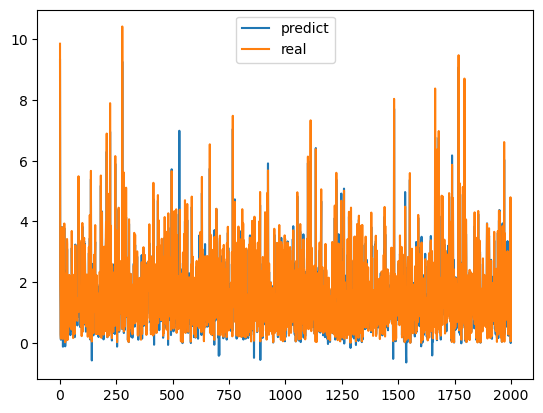

In [223]:
import matplotlib.pyplot as plt

r = len(y_train) + 1


plt.plot(np.arange(1,r), train_y_pred, label="predict")

plt.plot(np.arange(1,r), y_train, label="real")

plt.legend()

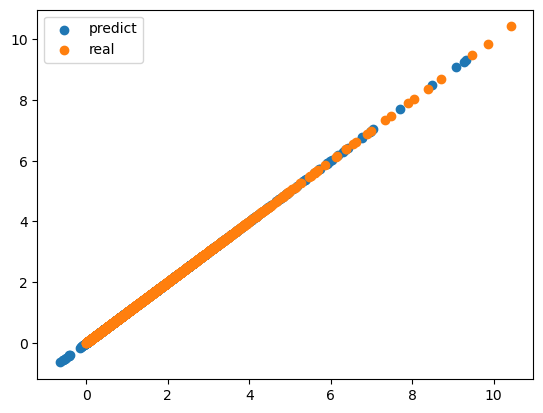

In [224]:
plt.scatter( train_y_pred, train_y_pred ,label="predict")
plt.scatter( y_train, y_train, label="real")

plt.legend()

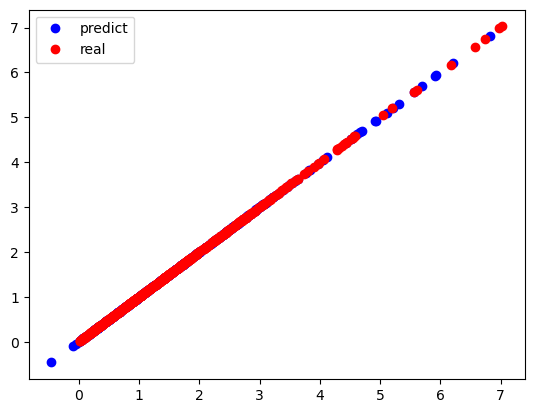

In [225]:
plt.plot( test_y_pred, test_y_pred,'bo' ,label="predict")

plt.plot( y_test, y_test,'ro', label="real")

plt.legend()

In [226]:
print("train")
get_result(y_train, train_y_pred)
print("test")
get_result(y_test, test_y_pred )

train
R2: 0.9388477648619252
RD: [-0.0542687   0.19631004 -0.04806019 ... -0.07360754 -1.0982682
  0.12342113]
ARD: [0.0542687  0.19631004 0.04806019 ... 0.07360754 1.0982682  0.12342113]
AARD: 0.3184607739165374
mse: 0.08949096287238903
rmse: 0.29915040175869567
mae: 0.19806120772171976
test
R2: 0.843899046087103
RD: [-8.59563910e-02  8.81977473e-03  2.67542376e-01  6.27713644e-02
 -4.83466417e-01 -1.42027748e-01  1.18920509e-02 -4.23956368e-01
 -3.71080460e-01 -1.61068470e-01  1.03558704e+00 -1.10838395e-01
 -1.68448319e-01  1.60171718e+00  2.55241803e-02  1.70541405e-01
 -2.91386188e+00 -1.09520458e-01 -2.95053189e-01  8.43157272e-01
 -8.56233207e-02 -8.56024430e-02  1.08703929e-01  2.64673279e-02
 -6.12158204e-01  8.43161637e-02 -1.86592946e-01 -7.57476759e-02
 -1.17565705e-01 -8.48802172e-03  3.20644296e-01 -1.01656452e-01
  2.96268604e-01  6.00322988e-02 -6.43350342e-01 -5.06817511e-02
  1.46772319e-02 -1.93361015e-01 -1.45430448e+00 -1.20992689e-01
 -7.49507105e-02  5.04833595e-

In [227]:
train_RD = get_rd(y_train, train_y_pred)
train_ARD = get_ard(y_train, train_y_pred)
X_train['RD']=train_RD
X_train['ARD']= train_ARD
X_train['CO2'] = y_train
X_train['type'] ='train'

In [228]:
test_RD = get_rd(y_test, test_y_pred)
test_ARD = get_ard(y_test, test_y_pred)
X_test['RD']=test_RD
X_test['ARD']= test_ARD
X_test['CO2'] = y_test
X_test['type']='test'

In [229]:
X_train.shape

(2000, 53)

In [230]:
X_test.shape

(500, 53)

In [231]:
import pickle
with open('result/nn_regresion_1228_co2', 'wb') as file:
    pickle.dump(mlp, file)

with open('result/sc_mode_1228_co2','wb') as file:
    pickle.dump(sc, file)

In [232]:
X_train['pred']=train_y_pred
X_test['pred']=test_y_pred

In [233]:
X_train.to_csv('result/X_train_result_ANN_CO2.csv')
X_test.to_csv('result/X_test_result_ANN_CO2.csv')

In [234]:
#代码完